In [1]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_val = pd.read_csv('../input/genetic-engineering-attribution-challenge/train_values.csv', index_col='sequence_id')
test_val = pd.read_csv('../input/genetic-engineering-attribution-challenge/test_values.csv', index_col='sequence_id')
submission = pd.read_csv('../input/genetic-engineering-attribution-challenge/submission_format_3TFRxH6.csv')
train_labels = pd.read_csv('../input/genetic-engineering-attribution-challenge/train_labels.csv', index_col='sequence_id')


In [3]:
train_val.head()

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCA...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,GCTGGATGGTTTGGGACATGTGCAGCCCCGTCTCTGTATGGAGTGA...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,NNCCGGGCTGTAGCTACACAGGGCGGAGATGAGAGCCCTACGAAAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,GCGGAGATGAAGAGCCCTACGAAAGCTGAGCCTGCGACTCCCGCAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,CGCGCATTACTTCACATGGTCCTCAAGGGTAACATGAAAGTGATCC...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


We have one non-numeric column, sequence, which contains the DNA plasmid sequence.

In [4]:
train_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63017 entries, 9ZIMC to U5MR3
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   sequence                              63017 non-null  object 
 1   bacterial_resistance_ampicillin       63017 non-null  float64
 2   bacterial_resistance_chloramphenicol  63017 non-null  float64
 3   bacterial_resistance_kanamycin        63017 non-null  float64
 4   bacterial_resistance_other            63017 non-null  float64
 5   bacterial_resistance_spectinomycin    63017 non-null  float64
 6   copy_number_high_copy                 63017 non-null  float64
 7   copy_number_low_copy                  63017 non-null  float64
 8   copy_number_unknown                   63017 non-null  float64
 9   growth_strain_ccdb_survival           63017 non-null  float64
 10  growth_strain_dh10b                   63017 non-null  float64
 11  growth_strain_dh

The length of these sequences vary. Some are as short as 20 characters and others are as long as 60,000!

In [5]:
sequence_lengths = train_val.sequence.apply(len)

sequence_lengths.describe()

count    63017.000000
mean      4839.025501
std       3883.148431
min         20.000000
25%        909.000000
50%       4741.000000
75%       7490.000000
max      60099.000000
Name: sequence, dtype: float64

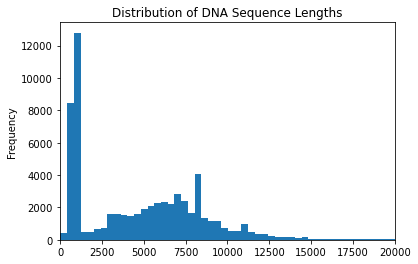

In [6]:
sequence_lengths.plot(
    kind='hist', 
    title='Distribution of DNA Sequence Lengths', 
    bins=150,
    xlim=(0, 20000));

In [7]:
# exclude the 0th column which is the dna sequence
train_val.iloc[:, 1:].apply(pd.value_counts)

,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,growth_strain_dh10b,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
0.0,19590,60506,48706,62078,58592,18750,57313,50059,61841,61285,...,61417,61478,36890,57732,61978,62322,56381,61949,55170,61742
1.0,43427,2511,14311,939,4425,44267,5704,12958,1176,1732,...,1600,1539,26127,5285,1039,695,6636,1068,7847,1275


Since these columns are binary, the mean value shows us the prevalence, meaning what proportion of sequences have that characteristic. Check out the problem description page for definitions of each feature.

This plot shows us that a few features are common across sequences but most are quite rare.

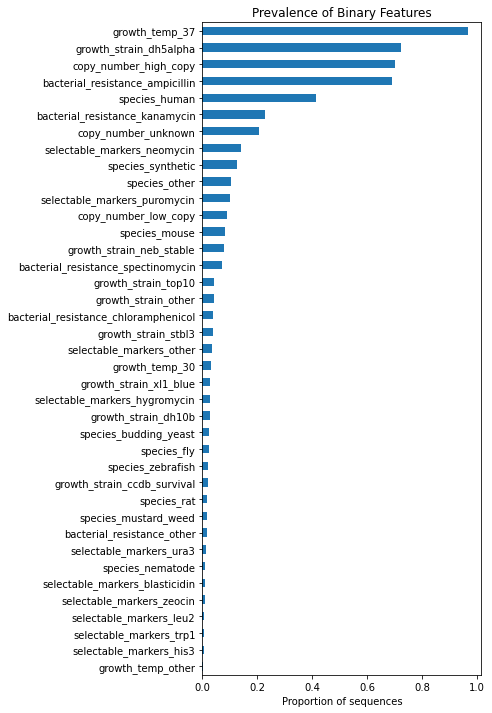

In [8]:
sorted_binary_features = train_val.iloc[:, 1:].mean().sort_values()

ax = sorted_binary_features.plot(kind='barh',
                                 stacked=True,
                                 figsize=(5, 12),
                                 title='Prevalence of Binary Features')
ax.set_xlabel('Proportion of sequences');

# Test set

Our test set features are set up in the same way as the training set.

In [9]:
test_val.head()

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
E0VFT,AGATCTATACATTGAATCAATATTGGCAATTAGCCATATTAGTCAT...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
TTRK5,GCGCGCGTTGACATTGATTATTGACTAGTTATTAATAGTAATCAAT...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Z7FZ,GCTTAAGCGGTCGACGGATCGGGAGATCTCCCGATCCCCTATGGTG...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VJI6E,ATGATGATGATGTCCCTGAACAGCAAGCAGGCGTTTAGCATGCCGC...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721FI,GGTACCGAGCTCTTACGCGTGCTAGCCATACTATCAGCCACTTGTG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
test_val.sequence.apply(len).describe()

count    18816.000000
mean      4875.523810
std       4004.117614
min         19.000000
25%        894.750000
50%       4732.000000
75%       7341.250000
max      38638.000000
Name: sequence, dtype: float64

# TRAINING LABELS

Now let's look at our labels. It's important to recognize that these are one-hot encoded. Each column represents a lab ID. The correct lab for a given sequence_id is indicated by a 1.0 in that column, and 0.0 otherwise.

In [11]:
train_labels.head()

,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,...,ZQNGGY33,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To make our modeling and analysis simpler, let's collapse the labels dataframe into one column that shows us the lab ID for each sequence.

In [12]:
# get the column with the max value in each row
lab_ids = pd.DataFrame(train_labels.idxmax(axis=1), columns=['lab_id'])
lab_ids.head()

,lab_id
sequence_id,
9ZIMC,RYUA3GVO
5SAQC,RYUA3GVO
E7QRO,RYUA3GVO
CT5FP,RYUA3GVO
7PTD8,RYUA3GVO


Labs can have anywhere from 1 to over 8,000 sequences in the data. On average, there are about 48 sequences per lab in the training data.

In [13]:
# get the distrubtion of lab prevalence in the training set
lab_ids['lab_id'].value_counts().describe()

count    1314.000000
mean       47.958143
std       262.552258
min         1.000000
25%         9.000000
50%        15.000000
75%        34.000000
max      8286.000000
Name: lab_id, dtype: float64

Sorting labs by prevalence, we see that lab ID I7FXTVDP accounts for 13% of the sequences in the train set. The top 3 labs account for more than 20% of the data. We'll have to be mindful of class imbalance in our training.

In [14]:
# Sort lab ids by prevalence
(lab_ids['lab_id'].value_counts(normalize=True)
        .sort_values(ascending=False)).head()

I7FXTVDP    0.131488
RKJHZGDQ    0.043353
GTVTUGVY    0.042401
A18S09P2    0.016884
Q2K8NHZY    0.015440
Name: lab_id, dtype: float64

# CONSTRUCT FEATURES FROM DNA SEQUENCES

For this benchmark, we're going to use the DNA sequences as the basis for the features in our model. We've got some preprocessing work to do to turn these lengthy strings into useful features!

These sequences are composed of five characters. G, C, A, and T represent the four nucleotides commonly found in DNA (guanine, cytosine, adenine, thymine). N stand for any nucleotide (not a gap).

In [15]:
bases = set(''.join(train_val.sequence.values))
bases

{'A', 'C', 'G', 'N', 'T'}

One common way to turn strings into useful features is to count n-grams, or continuous subsequences of length n. Here, we'll split up the DNA sequences into four-grams, or subsequences consisting of 4 bases.

With 5 unique bases, we can produce 120 different sequence permutations consisting of 4 bases. You can play around with the length of n to see how it affects your model.

In [16]:
from itertools import permutations

n = 4
subsequences = [''.join(permutation) for permutation in permutations(bases, r=n)]

In [17]:
print(f"Number of subsequences: {len(subsequences)}")
subsequences[:10]

Number of subsequences: 120


['ANGC',
 'ANGT',
 'ANCG',
 'ANCT',
 'ANTG',
 'ANTC',
 'AGNC',
 'AGNT',
 'AGCN',
 'AGCT']

We can now turn our strings into features by taking a simple count of each subsequence. We could do this one of two ways:

Overlapping substrings: To count overlapping substrings, we would use a sliding window such that the sequence "ATTATTA" will result in a count of 2 for the substring "ATTA" ("ATTA-TTA" and "ATT-ATTA").

Non-overlapping substrings: To count non-overlapping substrings, we search for each substring. If we find it, we count it and then continue our search at the end of the substring. In this case, "ATTATTA" will result in a count of 1 for the substring "ATTA" ("ATTA-TTA").

For simplicity, we're going to use the second method of non-overlapping substrings. We can use the built in count method on strings. Feel free to try both methods to see how it affects your model.

In [18]:
# Example of built-in count method on strings
# Because it's non-overlapping, "atta" is only counted twice
"gattattattaca".count("atta")

2

Now let's create a helper function to generate features. get_ngram_features will create a new dataframe that holds the counts for each subsequence and row in our data.

In [19]:
def get_ngram_features(data, subsequences):
    """Generates counts for each subsequence.

    Args:
        data (DataFrame): The data you want to create features from. Must include a "sequence" column.
        subsequences (list): A list of subsequences to count.

    Returns:
        DataFrame: A DataFrame with one column for each subsequence.
    """
    features = pd.DataFrame(index=data.index)
    for subseq in subsequences:
        features[subseq] = data.sequence.str.count(subseq)
    return features

Using our helper function, we can generate feautures for all the sequences in our training set! This will take a minute or two to run.

In [20]:
# Calculate n-gram features on our training set
ngram_features = get_ngram_features(train_val, subsequences)
ngram_features.head()


,ANGC,ANGT,ANCG,ANCT,ANTG,ANTC,AGNC,AGNT,AGCN,AGCT,...,TGNA,TGNC,TGCA,TGCN,TCAN,TCAG,TCNA,TCNG,TCGA,TCGN
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,0,0,0,0,0,0,0,0,0,39,...,0,0,29,0,0,37,0,0,24,0
5SAQC,0,0,0,0,0,0,0,0,0,2,...,0,0,2,0,0,0,0,0,0,0
E7QRO,1,0,1,0,0,0,0,0,0,3,...,0,0,0,1,0,1,0,0,0,0
CT5FP,0,0,0,0,0,0,0,0,0,2,...,0,0,5,0,0,6,0,0,3,0
7PTD8,1,0,0,0,0,0,0,0,0,5,...,0,0,2,0,0,3,0,0,3,0


In [21]:
ngram_features.shape

(63017, 120)

We now have features for all 120 possible subsequences. Their values show the counts of each 4-gram within the full DNA sequence.

Let's join them with our one-hot endcoded binary features.

In [22]:
all_features = ngram_features.join(train_val.drop('sequence', axis=1))

In [23]:
all_features.head()

,ANGC,ANGT,ANCG,ANCT,ANTG,ANTC,AGNC,AGNT,AGCN,AGCT,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,0,0,0,0,0,0,0,0,0,39,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,0,0,0,0,0,0,0,0,0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,1,0,1,0,0,0,0,0,0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,0,0,0,0,0,0,0,0,0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,1,0,0,0,0,0,0,0,0,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
all_features.shape

(63017, 159)

# THE ERROR METRIC: TOP TEN ACCURACY


The goal for this competition is to help narrow down the field of possible labs-of-origin from thousands to just a few. To that end, predictions will be evaluated based on top-ten accuracy. That means we'll consider a prediction "correct" if the true lab-of-origin is in the top ten most likely labs.

There is not a built in evaluation metric for top-k accuracy in scikit-learn, so we'll be constructing a custom scorer. We'll use this to determine the final accuracy of our model.

First, we'll need to create a custom scorer that can take in an estimator, validation data, and labels, and output a score based on the top ten results from each predicton. Scikit-learn let's us do this if we adhere to a specific signature.

**From the documentation:**

For a callable to be a scorer, it needs to meet the protocol specified by the following two rules:

It can be called with parameters (estimator, X, y), where estimator is the model that should be evaluated, X is validation data, and y is the ground truth target for X (in the supervised case) or None (in the unsupervised case).

It returns a floating point number that quantifies the estimator prediction quality on X, with reference to y. Again, by convention higher numbers are better, so if your scorer returns loss, that value should be negated.

In [25]:
def top10_accuracy_scorer(estimator, X, y):
    """A custom scorer that evaluates a model on whether the correct label is in 
    the top 10 most probable predictions.

    Args:
        estimator (sklearn estimator): The sklearn model that should be evaluated.
        X (numpy array): The validation data.
        y (numpy array): The ground truth labels.

    Returns:
        float: Accuracy of the model as defined by the proportion of predictions
               in which the correct label was in the top 10. Higher is better.
    """
    # predict the probabilities across all possible labels for rows in our training set
    probas = estimator.predict_proba(X)
    
    # get the indices for top 10 predictions for each row; these are the last ten in each row
    # Note: We use argpartition, which is O(n), vs argsort, which uses the quicksort algorithm 
    # by default and is O(n^2) in the worst case. We can do this because we only need the top ten
    # partitioned, not in sorted order.
    # Documentation: https://numpy.org/doc/1.18/reference/generated/numpy.argpartition.html
    top10_idx = np.argpartition(probas, -10, axis=1)[:, -10:]
    
    # index into the classes list using the top ten indices to get the class names
    top10_preds = estimator.classes_[top10_idx]

    # check if y-true is in top 10 for each set of predictions
    mask = top10_preds == y.reshape((y.size, 1))
    
    # take the mean
    top_10_accuracy = mask.any(axis=1).mean()
 
    return top_10_accuracy

# BUILD THE MODEL

Random forests are often a good first model to try so we'll start there.

## RANDOM FOREST

It's easy to build a random forest model with Scikit Learn. We're going to create a simple model with a few specified hyperparameters.

Tip: If you wanted to get fancy, you could perform a cross-validated grid search with GridSearchCV. You could even use the custom scorer we made earlier to train your model by passing it in via the scoring parameter.

In [26]:
from sklearn.ensemble import RandomForestClassifier

Let's generate our labels and rename our features to match.

In [ ]:
# Rename our feature array
X = all_features

# Create our labels
y = lab_ids.values.ravel()

We've got our features and our labels. Time to train!

Wait a sec... aren't we forgetting something? Oh right, we still have to address the class imbalance we discovered earlier. Luckily, scikit-learn has an easy solution for us. We can set class_weight to "balanced". This will set class weights inversely proportional to the class frequency.

Great! Now let's generate and fit our model.

In [27]:
rf = RandomForestClassifier(
    n_jobs=10, 
    n_estimators=150,
    class_weight='balanced', 
    max_depth=20, 
    random_state=1230 
)

# fit our model
rf.fit(X, y)

NameError: name 'X' is not defined

Let's see how our model scored on our training data.

In [ ]:
rf.score(X, y)

Nice! 65.69% accuracy isn't too shabby for our first try. However, that's using the default scorer, which is vanilla top-1 accuracy. We should expect to do better on the competition metric, top-10 accuracy. Let's use our custom defined scorer to see how we did:

In [ ]:
top10_accuracy_scorer(rf, X, y)

Our model got about 83.46% top ten accuracy. Not bad! Now let's make some predictions using our newly trained model.

# PREDICT AND SUBMIT

Now we'll create features from our test set and generate predictions. We need to make sure to generate probabilities for each lab ID so that the top 10 accuracy metric can be computed.

First, let's create the 4-gram features and join it with the binary features.

In [ ]:
test_ngram_features = get_ngram_features(test_val, subsequences)
all_test_features = test_ngram_features.join(test_val.drop('sequence', axis=1))

# MAKE PREDICTIONS

It's important to use predict_proba here, which gives us class probabilities, instead of predict, which would give us class predictions.

In [ ]:
probas = xgb.predict_proba(all_test_features)

# Examine first row
probas[0]

## SAVE SUBMISSION

Now let's get our matrix of probabilities ready for submission.

In [ ]:
submission_format = pd.read_csv('../input/genetic-engineering-attribution-challenge/submission_format_3TFRxH6.csv', index_col='sequence_id')

In [ ]:
submission_format.head()


Before we create our submission csv, let's make sure the submission format matches the shape of our predicted probabilities. We're also going to check that the predicted classes are in the same order as the submission format columns.

In [ ]:
assert submission_format.shape == probas.shape
assert (xgb.classes_ == submission_format.columns).all()

In [ ]:
my_submission = pd.DataFrame(data=probas, 
                             columns=cat.classes_, 
                             index=submission_format.index)

In [ ]:
my_submission.head()

Looks good! Let's save and submit!

In [ ]:
my_submission.to_csv('submission.csv')
print('Exported')